In [4]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from argparse import Namespace

from torch import nn
from dataloader import load_data
from tqdm import tqdm


train_inputs,train_lables,test_inputs,test_lables=load_data(60000,60000,device=torch.device('cuda:6'))




load data set
create loader
construct data


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


In [43]:
import torch
import model
# from model import Bias
from torch import nn
import importlib
# importlib.reload(model)


def acc(model):
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
        
        for i in range(len(test_inputs)):
            outputs=model(test_inputs[i])
            _,predicted=torch.max(outputs.data,1)
            total+=len(predicted)
            correct+=(predicted==test_lables[i]).sum().item()
    model.train()
    return correct/total


mlp = torch.load('./mlp.pth')
print(len(mlp.layers))
device='cuda:6'

def svd(reduce,bound):
    for k,layer in enumerate(mlp.layers):
        if (isinstance(layer, torch.nn.Linear)):
            w=layer.weight
            b=layer.bias
            U,S,V=torch.linalg.svd(w.t())

            sort_index=torch.argsort(S)
            cnt=0
            for i in S.view(-1):
                if(i.item()<reduce):
                    cnt+=1
            print(f"reduced{k}:{cnt/len(S)}")
            if (len(S)<bound):
                continue
            index_remove=sort_index[:cnt]
            # input()

            Vn_mask=torch.ones(V.size(0),dtype=torch.bool)
            Vm_mask=torch.ones(V.size(1),dtype=torch.bool)
            Un_mask=torch.ones(U.size(0),dtype=torch.bool)
            Um_mask=torch.ones(U.size(1),dtype=torch.bool)
            S_mask=torch.ones(S.size(0),dtype=torch.bool)
            for removei in index_remove:
                Vn_mask[removei]=False
                Vm_mask[removei]=False
                Un_mask[removei]=False
                Um_mask[removei]=False
                S_mask[removei]=False
            V=V[Vn_mask,:]
            U=U[:,Un_mask]
            S=S[S_mask]

            
            nU=U.shape[0]
            mU=U.shape[1]
            nV=V.shape[0]
            mV=V.shape[1]
            nS=mU
            mS=nV

            S_diag = torch.zeros(nS,mS)
            for i in range(S.shape[0]):
                S_diag[i, i] = S[i]
            S=S_diag



            # nU=U.shape[0]
            # mU=U.shape[1]
            # nV=V.shape[0]
            # mV=V.shape[1]
            # nS=mU
            # mS=nV
            # if(min(nU,nV)>bound):
            #     r=int(min(nU,nV)*reduce)
            # else:
            #     r=int(min(nU,nV))
            # U=U[:,:r]
            # mU=r
            # V=V[:r,]
            # nV=r
            # S_diag = torch.zeros(nS,mS)
            # for i in range(S.shape[0]):
            #     S_diag[i, i] = S[i]
            # S=S_diag
            # S=S[:r,:r]
            # nS=r
            # mS=r

            newlinear1=torch.nn.Linear(nU,mU,bias=False).to(device)
            newlinear2=torch.nn.Linear(nS,mS,bias=False).to(device)
            newlinear3=torch.nn.Linear(nV,mV,bias=False).to(device)
            newlinear1.weight=nn.Parameter(U.t())
            newlinear2.weight=nn.Parameter(S.t())
            newlinear3.weight=nn.Parameter(V.t())
            newbias=model.Bias(b)
            newbias=newbias.to(device)
            # print(newlinear1.weight.shape)
            # print(newlinear2.weight.shape)
            # print(newlinear3.weight.shape)
            # print('------------')
            svded=nn.Sequential(newlinear1,newlinear2,newlinear3,newbias)
            mlp.layers[k]=svded

from matplotlib import pylab as plt
y=[]
import numpy as np
bound=1024
for i in np.arange(1.5, 0, -0.05):
    mlp = torch.load('./mlp.pth')
    svd(i,bound)
    mlp.eval()
    mlp.to(device)
    # for layer in mlp.layers:
    #     if(isinstance(layer,torch.nn.Sequential)):
    #         for sublayer in layer:
    #             sublayer.to(device)
    #             if(not isinstance(sublayer,nn.Module)):
    #                 print(sublayer.weight.shape)
        # print('----------------')
    print(acc(mlp))
    y.append(acc(mlp))




/tmp/ipykernel_2030256/108581634.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mlp = torch.load('./mlp.pth')
/tmp/ipykernel_2030256/108581634.py:118: FutureWarning: Y

15
reduced0:0.5446428571428571
reduced2:0.642578125
reduced4:0.623046875
reduced6:0.62890625
reduced8:0.6171875
reduced10:0.625
reduced12:0.59375
reduced14:0.7
0.8042
reduced0:0.5229591836734694
reduced2:0.623046875
reduced4:0.595703125
reduced6:0.59765625
reduced8:0.5859375
reduced10:0.578125
reduced12:0.59375
reduced14:0.6
0.7904
reduced0:0.5025510204081632
reduced2:0.603515625
reduced4:0.564453125
reduced6:0.5703125
reduced8:0.5625
reduced10:0.546875
reduced12:0.5625
reduced14:0.6
0.8122
reduced0:0.48214285714285715
reduced2:0.5849609375
reduced4:0.537109375
reduced6:0.54296875
reduced8:0.5390625
reduced10:0.515625
reduced12:0.53125
reduced14:0.6
0.8169
reduced0:0.4630102040816326
reduced2:0.5634765625
reduced4:0.501953125
reduced6:0.5078125
reduced8:0.4921875
reduced10:0.5
reduced12:0.5
reduced14:0.6
0.8376
reduced0:0.44005102040816324
reduced2:0.5439453125
reduced4:0.47265625
reduced6:0.48046875
reduced8:0.46875
reduced10:0.484375
reduced12:0.46875
reduced14:0.6
0.8514
reduced0:0.

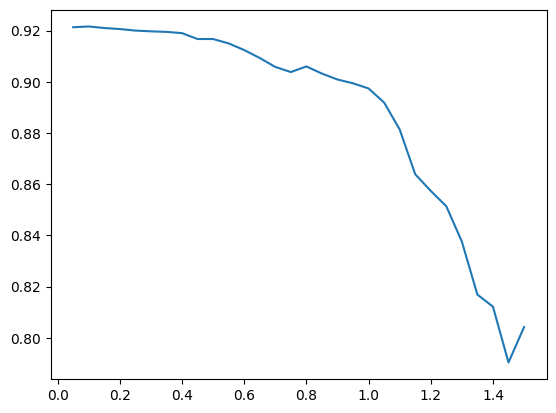

In [46]:
# plt.plot(np.arange(1,0,-0.02),y)
x=np.arange(1.5,0,-0.05)
plt.plot(x,y)
plt.show()

In [46]:
import torch
import model
# from model import Bias
from torch import nn
import importlib
import copy
# importlib.reload(model)


def acc(model):
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
        
        for i in range(len(test_inputs)):
            outputs=model(test_inputs[i])
            _,predicted=torch.max(outputs.data,1)
            total+=len(predicted)
            correct+=(predicted==test_lables[i]).sum().item()
    model.train()
    return correct/total


# mlp = torch.load('./mlp2.pth')
# print(len(mlp.layers))
device='cuda:6'

def svd(reduce,boundup,boundown,mlp):
    for k,layer in enumerate(mlp.layers):
        # print(layer)
        if (isinstance(layer, torch.nn.Linear)):
            w=layer.weight
            w=w.to(device)
            b=layer.bias
            U,S,V=torch.linalg.svd(w)
            # print(U)
            nU=U.shape[0]
            mU=U.shape[1]
            nV=V.shape[0]
            mV=V.shape[1]
            nS=mU
            mS=nV

            if(min(nU,nV)>=boundown and min(nU,nV)<=boundup):
                r=int(min(nU,nV)*reduce)
                # print('r:'+str(r))
            else:
                r=int(min(nU,nV))
                continue
            
            U=U[:,:r]
            mU=r
            V=V[:r,]
            nV=r

            S_diag = torch.zeros(nS,mS)
            for i in range(S.shape[0]):
                S_diag[i, i] = S[i]
            S=S_diag

            S=S[:r,:r]
            nS=r
            mS=r


            newlinear1=torch.nn.Linear(nU,mU,bias=False).to(device)
            newlinear2=torch.nn.Linear(nS,mS,bias=False).to(device)
            newlinear3=torch.nn.Linear(nV,mV,bias=False).to(device)
            newlinear1.weight=nn.Parameter(U)
            newlinear2.weight=nn.Parameter(S)
            newlinear3.weight=nn.Parameter(V)
            newbias=model.Bias(b)
            newbias=newbias.to(device)
            # print(newlinear1.weight.shape)
            # print(newlinear2.weight.shape)
            # print(newlinear3.weight.shape)
            # print('------------')
            svded=nn.Sequential(newlinear3,newlinear2,newlinear1,newbias).to(device)
            mlp.layers[k]=svded

from matplotlib import pylab as plt
y1=[]
y2=[]
import numpy as np
boundown=1513
boundup=4096
for i in np.arange(1, 0.2, -0.1):
    mlp = torch.load('./mlp2.pth')
    mlp.to(device)
    svd(i,boundup=boundup,boundown=boundown,mlp=mlp)
    boundown2=800
    boundup2=1513
    yi2=[]
    for j in np.arange(1,0,-0.02):
        # print('down----')
        mlp2=copy.deepcopy(mlp)
        svd(j,boundup=boundup2,boundown=boundown2,mlp=mlp2)
        # print('----')

        print(acc(mlp2))
        yi2.append(acc(mlp2))
    y2.append(yi2)
    y1.append(acc(mlp))
    print('-------')

# plt.plot(np.arange(1,0,-0.02),y)
# plt.plot(y1)
# plt.plot(y2)
# plt.show()


/tmp/ipykernel_1927571/1607845580.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mlp = torch.load('./mlp2.pth')


0.9455
0.9445
0.9454
0.9455
0.9436
0.9424
0.9386
0.9382
0.9377
0.9298
0.9276
0.9061
0.9077
0.9074
0.8974
0.8933
0.8843
0.8498
0.8581
0.8489
0.8222
0.8006
0.7815
0.7027
0.6125
0.5557
0.4844
0.5108
0.5189
0.4616
0.427
0.5232
0.4345
0.4247
0.4249
0.4067
0.3932
0.4247
0.4213
0.3959
0.2916
0.252
0.1825
0.1344
0.1249
0.1151
0.1021
0.1003
0.1032
0.0956
-------
0.9462
0.945
0.9453
0.9452
0.9435
0.941
0.9382
0.9371
0.9374
0.9265
0.9247
0.9015
0.9058
0.9052
0.8973
0.8944
0.8834
0.854
0.8609
0.8524
0.8277
0.8076
0.775
0.699
0.606
0.5511
0.4787
0.5038
0.5122
0.458
0.4268
0.5236
0.4347
0.4219
0.4221
0.4079
0.3931
0.4208
0.4279
0.3962
0.3034
0.2568
0.188
0.1342
0.1281
0.1157
0.102
0.0998
0.1023
0.0978
-------
0.9443
0.9423
0.9422
0.9425
0.9404
0.9402
0.9375
0.9317
0.9314
0.916
0.916
0.8921
0.9007
0.8979
0.8901
0.898
0.8903
0.8674
0.865
0.8377
0.818
0.7973
0.7481
0.6756
0.5924
0.5494
0.479
0.5016
0.5169
0.4509
0.4274
0.5349
0.4454
0.4345
0.4287
0.4106
0.3884
0.4172
0.4265
0.4021
0.3037
0.2622
0.1747


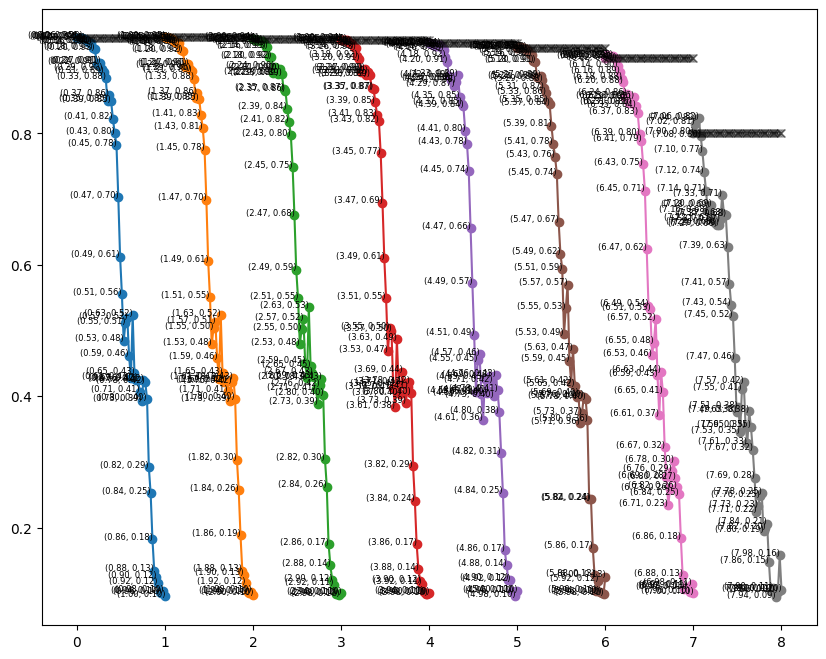

In [47]:
plt.figure(figsize=(10, 8))
for i in range(len(y1)):
    x = np.linspace(i, i + 1, len(y2[i]))  # 横坐标 1-5 偏移到 i-i+1 区间
    for j in range(len(y2[i])):
        plt.text(x[j], y2[i][j], f'({x[j]:.2f}, {y2[i][j]:.2f})', ha='right', fontsize=6)
    plt.plot(x, y2[i], marker='o', linestyle='-', label=f'第 {i+1} 组第二组数据')
    plt.plot(x, [y1[i]] * len(y2[i]), marker='x', linestyle='--', color='black', alpha=0.5, label=f'第 {i+1} 个第一组数据')
plt.show()